A number of geographic calculations are made on neighborhoods, often 3x3 (and sometimes larger) around a central pixel. For example, planar slope is calculated on a 3x3 neighborhood, as is the Topographic Roughness Index.  We aim to expand the number of these filters in the neilpy.filters module.

These filters are generally aimed to be used as an ndi.filters.generic_filter.  This method of processing is generally not recommended for large datasets, and is intended to be used for rapid prototyping, testing, and for pedagogical purposes.

In [1]:
import neilpy
import rasterio
import numpy as np
import scipy.ndimage as ndi
from skimage.util import apply_parallel
import matplotlib.pyplot as plt

In [2]:
with rasterio.open('../sample_data/sample_dem.tif') as src:
        Z = src.read(1)
        Zt = src.transform
        cellsize = Zt[0]

In [3]:
print(cellsize)

36.543169316625246


## ESRI Local Planar Slope

ESRI. 2017. <a href="http://desktop.arcgis.com/en/arcmap/10.5/tools/spatial-analyst-toolbox/how-slope-works.htm">How Slope Works</a>.

In [4]:
from neilpy.filters import esri_planar_slope

In [5]:
S = ndi.filters.generic_filter(Z,esri_planar_slope,size=3)
S = S / cellsize
S_deg = np.rad2deg(np.arctan(S))

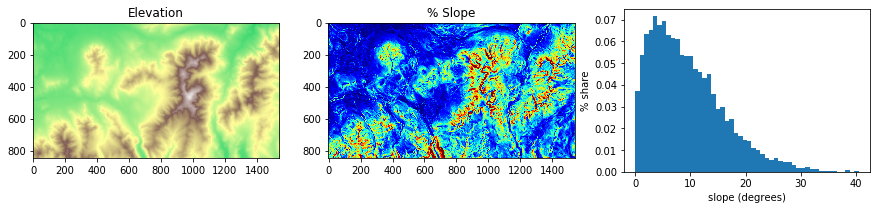

In [6]:
plt.figure(figsize=((15,3)))
plt.subplot(131)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.title('Elevation')
plt.subplot(132)
plt.imshow(S,cmap='jet',vmin=0,vmax=np.percentile(S,99))
plt.title('% Slope')
plt.subplot(133)
plt.hist(np.random.choice(S_deg.ravel(),10000),bins=50,density=1)
plt.xlabel('slope (degrees)')
plt.ylabel('% share')
plt.show()

ESRI Curvature

https://www.usna.edu/Users/oceano/pguth/md_help/html/geomorph_curvature.htm

https://www.esri.com/arcgis-blog/products/product/imagery/understanding-curvature-rasters/

http://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/how-curvature-works.htm

In [7]:
from neilpy.filters import esri_curvature

In [8]:
C = ndi.filters.generic_filter(Z,esri_curvature,size=3,extra_keywords={'cellsize':cellsize})
C_profile = ndi.filters.generic_filter(Z,esri_curvature,size=3,extra_keywords={'cellsize':cellsize,'kind':'profile'})
C_plan = ndi.filters.generic_filter(Z,esri_curvature,size=3,extra_keywords={'cellsize':cellsize,'kind':'plan'})

c:\Anaconda3\lib\site-packages\neilpy\filters.py:268: RuntimeWarning: invalid value encountered in double_scalars
  P1 = D*(G**2)
c:\Anaconda3\lib\site-packages\neilpy\filters.py:260: RuntimeWarning: invalid value encountered in double_scalars
  P3 = F*G*H


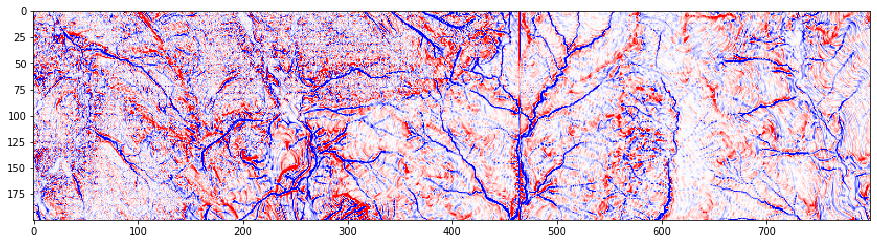

In [9]:
plt.figure(figsize=((15,10)))
plt.imshow(C[600:800,400:1200],cmap='bwr',vmin=-.5,vmax=.5)

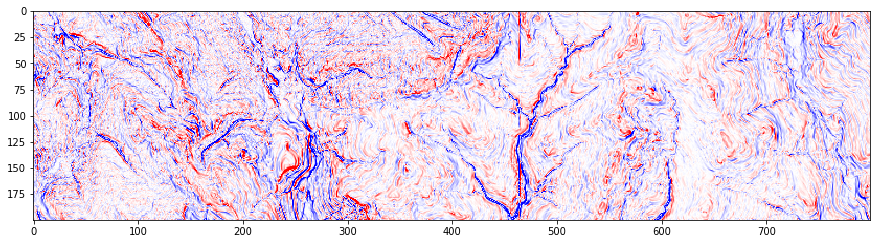

In [10]:
plt.figure(figsize=((15,10)))
plt.imshow(C_profile[600:800,400:1200],cmap='bwr',vmin=-.5,vmax=.5)

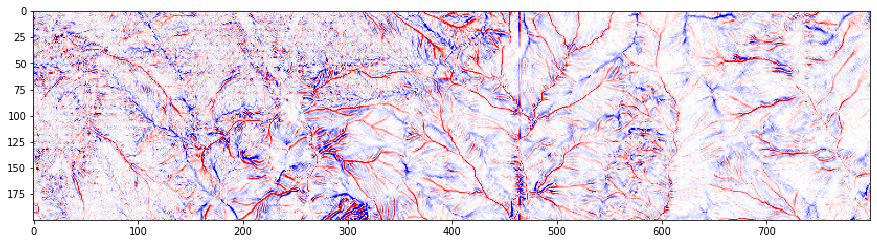

In [11]:
plt.figure(figsize=((15,10)))
plt.imshow(C_plan[600:800,400:1200],cmap='bwr',vmin=-.5,vmax=.5)

## Terrain Ruggedness Index

Riley et al. 1999. <a href="http://download.osgeo.org/qgis/doc/reference-docs/Terrain_Ruggedness_Index.pdf">A Terrain Ruggedness Index that Quantifies Topographic Heterogeneity</a>.

In [12]:
from neilpy.filters import terrain_ruggedness

In [13]:
TRI = ndi.filters.generic_filter(Z,terrain_ruggedness,size=3)

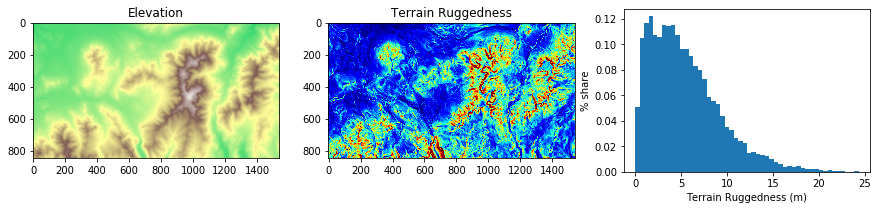

In [14]:
plt.figure(figsize=((15,3)))
plt.subplot(131)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.title('Elevation')
plt.subplot(132)
plt.imshow(TRI,cmap='jet',vmin=0,vmax=np.percentile(TRI,99))
plt.title('Terrain Ruggedness')
plt.subplot(133)
plt.hist(np.random.choice(TRI.ravel(),10000),bins=50,density=1)
plt.xlabel('Terrain Ruggedness (m)')
plt.ylabel('% share')
plt.show()

# Openness
Yokoyama et al. 2003. <A target="_blank" href="https://pdfs.semanticscholar.org/c3d9/a561fdb9e8c34a2b79152aea72b46090bb2e.pdf">Visualizing Topography by Openness: A New Application of Image Processing to Digital Elevation Models</a>

In [15]:
from neilpy.filters import openness_filter

In [16]:
lookup_pixels = 20
O = ndi.filters.generic_filter(Z,openness_filter,size=2*lookup_pixels+1,extra_keywords={'cellsize':cellsize})

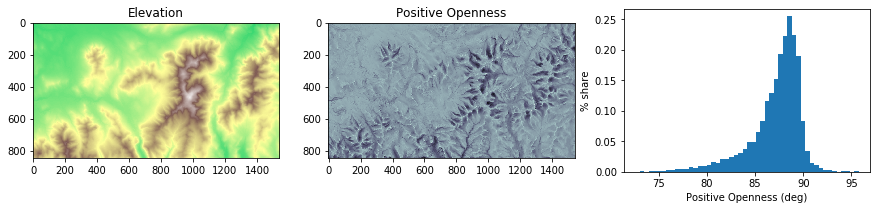

In [17]:
plt.figure(figsize=((15,3)))
plt.subplot(131)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.title('Elevation')
plt.subplot(132)
plt.imshow(O,cmap='bone')
plt.title('Positive Openness')
plt.subplot(133)
plt.hist(np.random.choice(O.ravel(),10000),bins=50,density=1)
plt.xlabel('Positive Openness (deg)')
plt.ylabel('% share')
plt.show()